In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
tf.__version__

'2.10.0'

In [2]:
network = tf.keras.applications.VGG19(include_top=False,weights="imagenet")

In [3]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [4]:
len(network.layers)

22

In [5]:
content_image = tf.keras.preprocessing.image.load_img("./Images/chaves.jpeg")

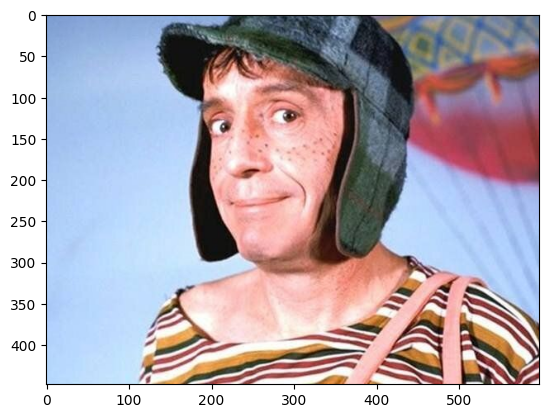

In [6]:
plt.imshow(content_image)

In [7]:
type(content_image)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
content_image = tf.keras.preprocessing.image.img_to_array(content_image)

In [9]:
type(content_image), content_image.shape, content_image.min(),content_image.max()

(numpy.ndarray, (448, 598, 3), 0.0, 255.0)

In [10]:
content_image = content_image / 255

In [11]:
content_image.min(),content_image.max()


(0.0, 1.0)

In [12]:
content_image

array([[[0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        [0.47843137, 0.6039216 , 0.8039216 ],
        ...,
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ],
        [0.38039216, 0.45882353, 0.5529412 ]],

       [[0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        [0.4862745 , 0.6117647 , 0.8117647 ],
        ...,
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434],
        [0.3882353 , 0.46666667, 0.56078434]],

       [[0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        [0.49019608, 0.6156863 , 0.8156863 ],
        ...,
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ],
        [0.3882353 , 0.4745098 , 0.5686275 ]],

       ...,

       [[0.7294118 , 0.8627451 , 1.        ],
        [0.7254902 , 0.85882354, 1.        ],
        [0.7254902 , 0

In [13]:
content_image = content_image[tf.newaxis,:]

In [14]:
content_image.shape

(1, 448, 598, 3)

In [15]:
style_image  = tf.keras.preprocessing.image.load_img("./Images/tarsila_amaral.jpg")

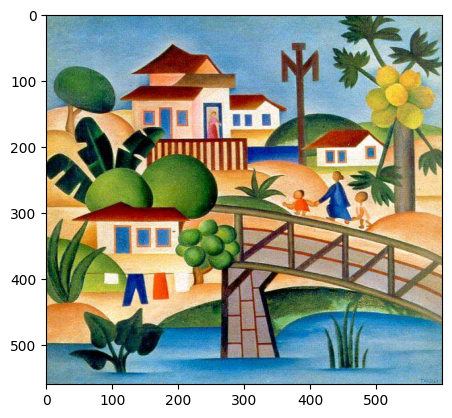

In [16]:
plt.imshow(style_image)

In [17]:
style_image = tf.keras.preprocessing.image.img_to_array(style_image)

In [18]:
type(style_image), style_image.shape

(numpy.ndarray, (560, 600, 3))

In [19]:
style_image = style_image / 255

In [20]:
style_image.min(), style_image.max()

(0.0, 1.0)

In [21]:
style_image = style_image[tf.newaxis,:]
style_image.shape

(1, 560, 600, 3)

# Building Neural Network

In [22]:
network.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [23]:
content_layers = ['block4_conv2']
style_layers = ['block1_conv1','block2_conv1','block3_conv1','block4_conv1','block5_conv1']

In [24]:
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)
num_content_layers,num_style_layers

(1, 5)

In [25]:
def vgg_layers(layer_names):
    vgg = tf.keras.applications.VGG19(include_top=False,weights="imagenet")
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    network = tf.keras.Model(inputs=[vgg.input],outputs=outputs)
    return network

In [26]:
style_extractor = vgg_layers(style_layers)

In [27]:
style_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [28]:
style_extractor.outputs

[<KerasTensor: shape=(None, None, None, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, None, None, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, None, None, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block4_conv1')>,
 <KerasTensor: shape=(None, None, None, 512) dtype=float32 (created by layer 'block5_conv1')>]

In [29]:
style_outputs = style_extractor(style_image)

In [30]:
len(style_outputs)

5

In [31]:
style_outputs[0].shape,style_outputs[1].shape,style_outputs[2].shape,style_outputs[3].shape,style_outputs[4].shape,

(TensorShape([1, 560, 600, 64]),
 TensorShape([1, 280, 300, 128]),
 TensorShape([1, 140, 150, 256]),
 TensorShape([1, 70, 75, 512]),
 TensorShape([1, 35, 37, 512]))

In [32]:
def gram_matrix(layer_activation):
    result = tf.linalg.einsum('bijc,bijd->bcd',layer_activation,layer_activation)
    input_shape = tf.shape(layer_activation)
    num_locations = tf.cast(input_shape[1]*input_shape[2],tf.float32)
    return result / num_locations


In [33]:
gram_matrix(style_outputs[0])

<tf.Tensor: shape=(1, 64, 64), dtype=float32, numpy=
array([[[0.63095695, 0.2893014 , 0.28514472, ..., 0.10537336,
         0.36956736, 0.450103  ],
        [0.2893014 , 0.24119975, 0.1838012 , ..., 0.03157628,
         0.19593169, 0.21714632],
        [0.28514472, 0.1838012 , 0.16742472, ..., 0.0277981 ,
         0.19409335, 0.22708268],
        ...,
        [0.10537336, 0.03157628, 0.0277981 , ..., 0.082973  ,
         0.06947858, 0.06642795],
        [0.36956736, 0.19593169, 0.19409335, ..., 0.06947858,
         0.28681284, 0.31852335],
        [0.450103  , 0.21714632, 0.22708268, ..., 0.06642795,
         0.31852335, 0.37466717]]], dtype=float32)>

In [41]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers,content_layers):
        super().__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layer = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False
    
    def call(self,inputs):
        inputs = inputs * 255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs = outputs[:self.num_style_layers]
        content_outputs = outputs[self.num_style_layers:]

        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]
        
        content_dict = {content_name: value for content_name,value in zip(self.content_layer,content_outputs)}
        style_dict = {style_name:value for style_name,value in zip(self.style_layers,style_outputs) }

        return {'content':content_dict,'style':style_dict}


In [42]:
extractor = StyleContentModel(style_layers,content_layers)

In [43]:
results = extractor(content_image)
results

{'content': {'block4_conv2': <tf.Tensor: shape=(1, 56, 74, 512), dtype=float32, numpy=
  array([[[[  17.565527,    0.      ,    0.      , ...,  574.69727 ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  291.5023  ,
             132.64592 ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,  333.48077 ,
             117.763794,    0.      ],
           ...,
           [ 692.981   ,    0.      ,    0.      , ..., 1512.2526  ,
              10.108272,  321.64676 ],
           [ 139.60138 ,    0.      ,    0.      , ..., 1108.7235  ,
             102.12366 ,  179.39984 ],
           [ 152.00333 ,    0.      ,    0.      , ...,  471.47653 ,
             179.3978  ,  670.94354 ]],
  
          [[   0.      ,    0.      ,    0.      , ...,  548.989   ,
               0.      ,    0.      ],
           [   0.      ,    0.      ,    0.      , ...,   43.527004,
               0.      ,    0.      ],
           [   0.      ,    0

In [44]:
for key,value in results.items():
    print(key,value.keys())

content dict_keys(['block4_conv2'])
style dict_keys(['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1'])


In [46]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [47]:
len(style_targets),len(content_targets)

(5, 1)

In [48]:
new_image = tf.Variable(content_image)

In [53]:
content_weight = 1
style_weight = 100

In [54]:
optimizer = tf.optimizers.Adam(learning_rate=0.2)

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Epoch 500 | content loss: 939429.75 | style loss: 702451968.0 | total loss 14049978368.0


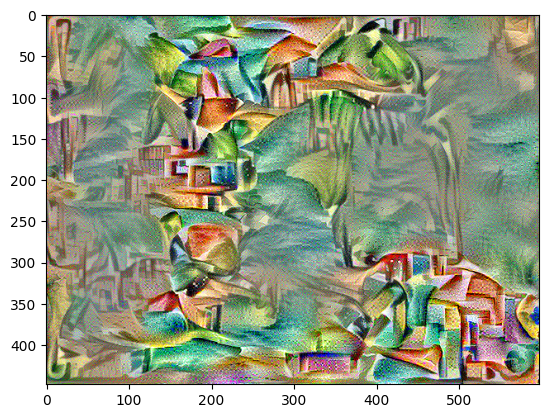

Epoch 1000 | content loss: 974246.9375 | style loss: 1332361984.0 | total loss 26648213504.0


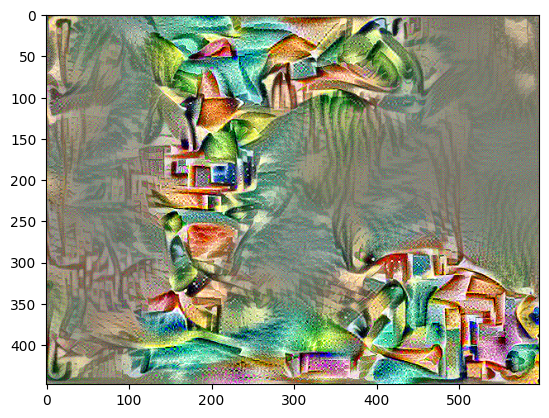

Epoch 1500 | content loss: 1011165.0625 | style loss: 7183713280.0 | total loss 143675293696.0


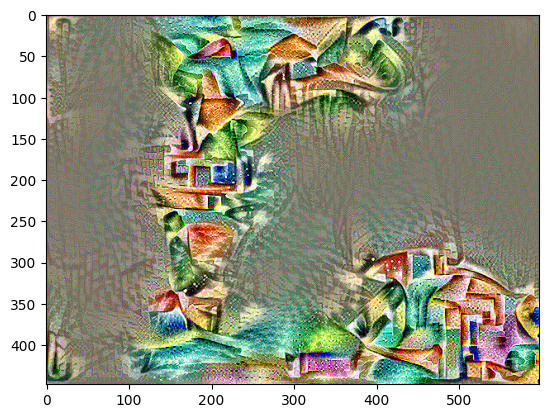

Epoch 2000 | content loss: 996281.125 | style loss: 1528880640.0 | total loss 30578608128.0


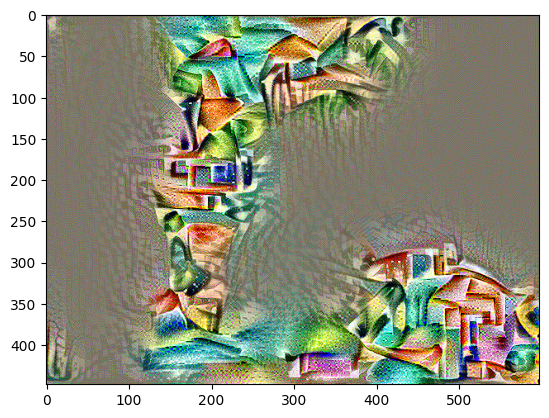

In [56]:
epochs = 2000
print_every = 500

for epoch in range(epochs):
  with tf.GradientTape() as tape:
    outputs = extractor(new_image)

    content_outputs = outputs['content']
    style_outputs = outputs['style']

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name] - content_targets[name]) ** 2) for name in content_outputs.keys()])
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name] - style_targets[name]) ** 2) for name in style_outputs.keys()])

    total_loss = content_loss * content_weight / num_content_layers + style_loss * style_weight / num_style_layers

  gradient = tape.gradient(total_loss, new_image)
  optimizer.apply_gradients([(gradient, new_image)])

  new_image.assign(tf.clip_by_value(new_image, 0.0, 1.0))

  if (epoch + 1) % print_every == 0:
    print('Epoch {} | content loss: {} | style loss: {} | total loss {}'.format(epoch + 1, content_loss, style_loss, total_loss))
    plt.imshow(tf.squeeze(new_image, axis = 0))
    plt.show()

(-0.5, 599.5, 559.5, -0.5)

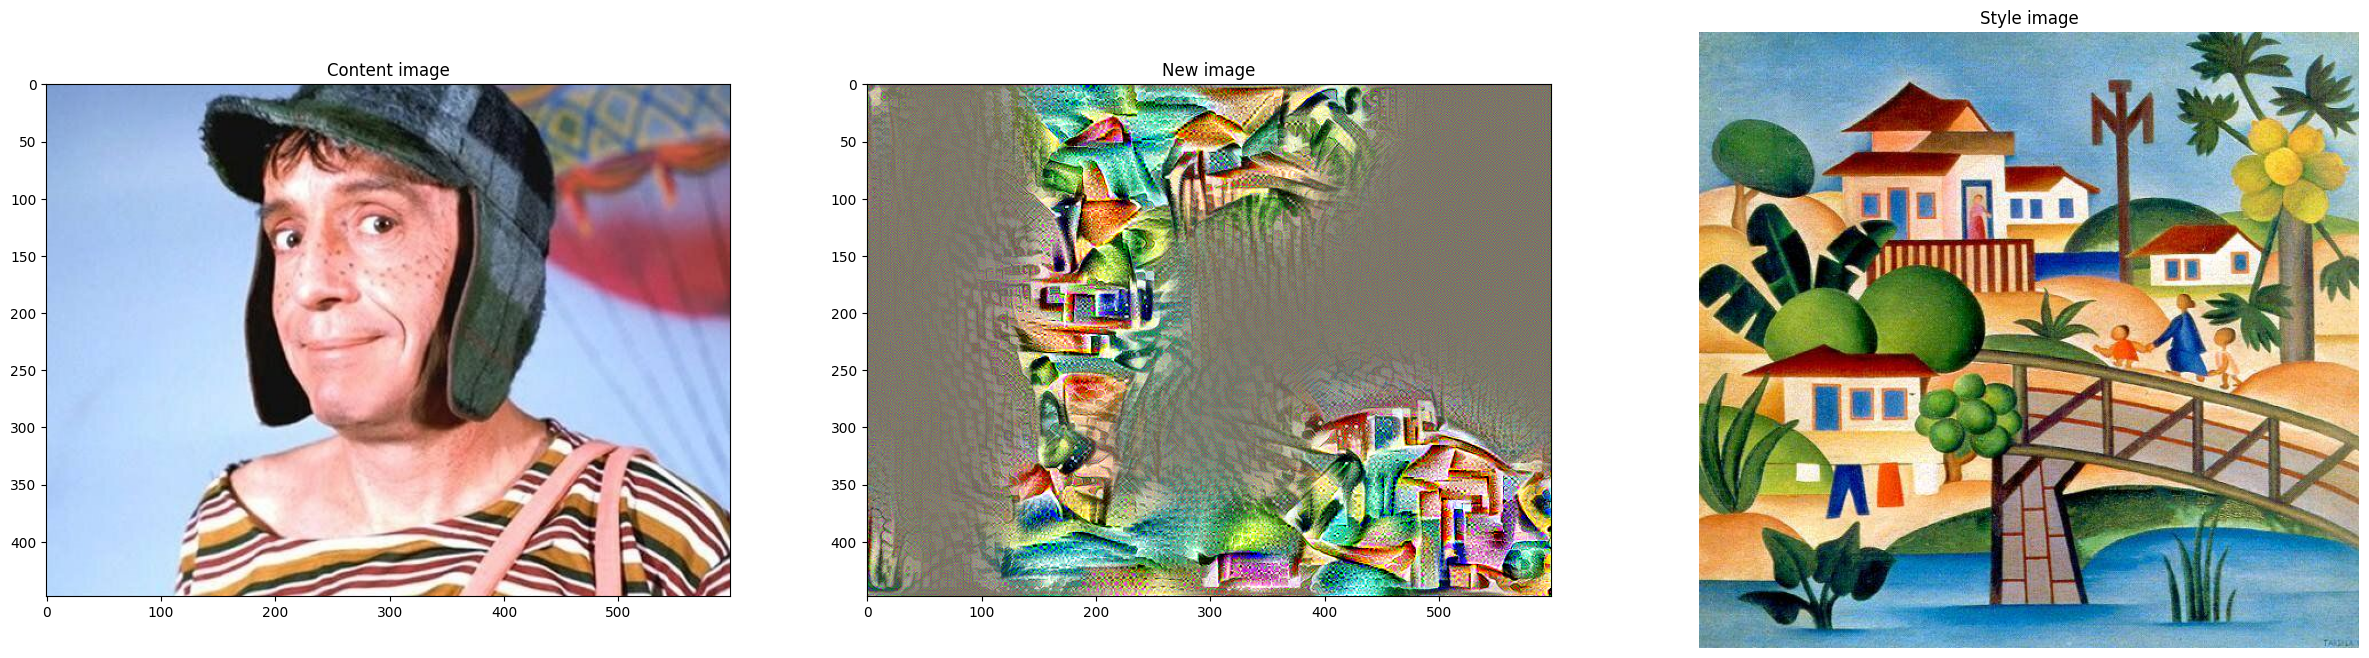

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,8))
ax1.imshow(tf.squeeze(content_image, axis = 0))
ax1.set_title('Content image')
ax2.imshow(tf.squeeze(new_image, axis = 0))
ax2.set_title('New image')
ax3.imshow(tf.squeeze(style_image, axis = 0))
ax3.set_title('Style image')
plt.axis('off')